# Group Members:
    Muhammad Ali P180089 
    Section: 8A
    Assignment=04

In [1]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [2]:
style.use('ggplot')
tickers = ['JWN', 'UBER','RCL']
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2020, 11, 20)
returns = pd.DataFrame() # create an empty data frame, returns.
returns

""


# Portfolio Optimization:

In [3]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,47.380001,46.900002,47.169998,47.169998,813600.0,41.316006
2014-01-03,47.470001,46.939999,47.270000,47.169998,698400.0,41.316006
2014-01-06,47.139999,46.110001,47.040001,46.160000,1519900.0,40.431355
2014-01-07,46.680000,46.020000,46.330002,46.060001,1333900.0,40.343769
2014-01-08,46.660000,45.950001,46.220001,46.560001,1720700.0,40.781708
...,...,...,...,...,...,...
2020-11-16,77.230003,74.019997,75.790001,75.500000,12110100.0,75.500000
2020-11-17,76.739998,73.739998,74.610001,75.339996,5924500.0,75.339996
2020-11-18,76.489998,74.050003,74.110001,74.129997,5810000.0,74.129997


In [4]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data[ticker] = data['Adj Close'].pct_change() # add a column to data frame, data, and store returns in it.
data


,High,Low,Open,Close,Volume,Adj Close,RCL
Date,,,,,,,
2014-01-02,47.380001,46.900002,47.169998,47.169998,813600.0,41.316006,NaN
2014-01-03,47.470001,46.939999,47.270000,47.169998,698400.0,41.316006,0.000000
2014-01-06,47.139999,46.110001,47.040001,46.160000,1519900.0,40.431358,-0.021412
2014-01-07,46.680000,46.020000,46.330002,46.060001,1333900.0,40.343758,-0.002167
2014-01-08,46.660000,45.950001,46.220001,46.560001,1720700.0,40.781700,0.010855
...,...,...,...,...,...,...,...
2020-11-16,77.230003,74.019997,75.790001,75.500000,12110100.0,75.500000,0.069254
2020-11-17,76.739998,73.739998,74.610001,75.339996,5924500.0,75.339996,-0.002119
2020-11-18,76.489998,74.050003,74.110001,74.129997,5810000.0,74.129997,-0.016061


In [5]:
13.972697 / 13.512726 - 1

0.034039837705582165

In [6]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
data


,High,Low,Open,Close,Volume,Adj Close,RCL
Date,,,,,,,
2014-01-02,47.380001,46.900002,47.169998,47.169998,813600.0,41.316006,NaN
2014-01-03,47.470001,46.939999,47.270000,47.169998,698400.0,41.316006,0.000000
2014-01-06,47.139999,46.110001,47.040001,46.160000,1519900.0,40.431358,-0.021412
2014-01-07,46.680000,46.020000,46.330002,46.060001,1333900.0,40.343765,-0.002166
2014-01-08,46.660000,45.950001,46.220001,46.560001,1720700.0,40.781708,0.010855
...,...,...,...,...,...,...,...
2020-11-16,77.230003,74.019997,75.790001,75.500000,12110100.0,75.500000,0.069254
2020-11-17,76.739998,73.739998,74.610001,75.339996,5924500.0,75.339996,-0.002119
2020-11-18,76.489998,74.050003,74.110001,74.129997,5810000.0,74.129997,-0.016061


In [7]:
returns

,JWN,UBER,RCL
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.003551,NaN,0.000000
2014-01-06,-0.012224,NaN,-0.021412
2014-01-07,-0.010585,NaN,-0.002166
2014-01-08,-0.004444,NaN,0.010855
...,...,...,...
2020-11-16,0.108608,0.033606,0.069254
2020-11-17,0.060969,-0.006503,-0.002119
2020-11-18,0.021120,0.004500,-0.016061


In [8]:
type(returns)

pandas.core.frame.DataFrame

## Determine the portfolio weights:

In [9]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    print(weights)

[0.14046343 0.9040006  0.63095591]
[0.56940137 0.82626542 0.51012071]
[0.5824575  0.85874258 0.43916474]
[0.72715996 0.52742721 0.17240624]
[0.29751172 0.42419731 0.27187931]


In [10]:
weights

array([0.29751172, 0.42419731, 0.27187931])

In [11]:
weights[0] + weights[1] # these will change every time we run the cells above.

0.7217090256815734

In [12]:
np.sum(weights)

0.9935883374769506

In [13]:
weights / np.sum(weights) # to impose constraint on weights to be equal to 1.

array([0.29943157, 0.42693467, 0.27363376])

In [14]:
weights = weights / np.sum(weights)

In [15]:
weights[0] + weights[1] # Now the sum of the weights invested in both the assets is precesiely equal to 1.

0.7263662408862721

In [16]:
weights = 0 # to start fresh for the following loop.
weights

0

In [17]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    weights = weights / np.sum(weights)
    print(weights)

[0.25782539 0.19053821 0.5516364 ]
[0.04571956 0.4707831  0.48349734]
[0.12994647 0.48394938 0.38610416]
[0.41303749 0.38092982 0.20603269]
[0.33993913 0.32982173 0.33023914]


In [18]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [19]:
weights = 0 # to start fresh for the following loop.
weights

0

In [20]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)

print(portfolio_weights)

[array([0.151, 0.548, 0.301]), array([0.203, 0.452, 0.345]), array([0.746, 0.246, 0.008]), array([0.03 , 0.471, 0.499]), array([0.134, 0.806, 0.06 ])]


## Compute Annualized Portfolio Returns:

In [21]:
returns # the data frame, returns, contains daily returns of the 2 stocks.

,JWN,UBER,RCL
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.003551,NaN,0.000000
2014-01-06,-0.012224,NaN,-0.021412
2014-01-07,-0.010585,NaN,-0.002166
2014-01-08,-0.004444,NaN,0.010855
...,...,...,...
2020-11-16,0.108608,0.033606,0.069254
2020-11-17,0.060969,-0.006503,-0.002119
2020-11-18,0.021120,0.004500,-0.016061


In [22]:
returns.mean() 

JWN    -0.000016
UBER    0.001242
RCL     0.000852
dtype: float64

In [23]:
weights # the weights of both the assets in a portfolio.

array([0.134, 0.806, 0.06 ])

In [24]:
weights[0], weights[1]

(0.134, 0.806)

In [25]:
0.002186 * weights[0] + 0.000582 * weights[1] 

0.0007620160000000001

In [26]:
np.sum(returns.mean() * weights) 

0.0010501194548026694

In [27]:
np.sum(returns.mean() * weights) * 252 

0.2646301026102727

In [28]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights

([],
 [],
 [],
 [array([0.151, 0.548, 0.301]),
  array([0.203, 0.452, 0.345]),
  array([0.746, 0.246, 0.008]),
  array([0.03 , 0.471, 0.499]),
  array([0.134, 0.806, 0.06 ])],
 0,
 array([0.134, 0.806, 0.06 ]))

In [29]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [30]:
weights = 0

In [31]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    annualized_return = np.round((annualized_return), 3)
    portfolio_return.append(annualized_return)

print(portfolio_weights)
print(portfolio_return)

[array([0.1  , 0.464, 0.436]), array([0.213, 0.421, 0.366]), array([0.381, 0.471, 0.147]), array([0.234, 0.364, 0.401]), array([0.239, 0.378, 0.383])]
[0.238, 0.209, 0.177, 0.199, 0.2]


## Compute Covariance Matrix and Portfolio's Risk:

In [32]:
returns

,JWN,UBER,RCL
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.003551,NaN,0.000000
2014-01-06,-0.012224,NaN,-0.021412
2014-01-07,-0.010585,NaN,-0.002166
2014-01-08,-0.004444,NaN,0.010855
...,...,...,...
2020-11-16,0.108608,0.033606,0.069254
2020-11-17,0.060969,-0.006503,-0.002119
2020-11-18,0.021120,0.004500,-0.016061


In [33]:
returns.cov()

,JWN,UBER,RCL
JWN,0.000907,0.000664,0.000441
UBER,0.000664,0.001758,0.001104
RCL,0.000441,0.001104,0.001044


In [34]:
returns.cov() * 252

,JWN,UBER,RCL
JWN,0.228649,0.167214,0.111226
UBER,0.167214,0.443141,0.278165
RCL,0.111226,0.278165,0.263029


In [35]:
covariance_matrix = returns.cov() * 252
covariance_matrix

,JWN,UBER,RCL
JWN,0.228649,0.167214,0.111226
UBER,0.167214,0.443141,0.278165
RCL,0.111226,0.278165,0.263029


In [36]:
weights

array([0.239, 0.378, 0.383])

In [37]:
weights.T # step A in excel.

array([0.239, 0.378, 0.383])

In [38]:
np.dot(covariance_matrix, weights) # step B in excel.

array([0.16045357, 0.31400842, 0.2324694 ])

In [39]:
np.dot(weights.T, np.dot(covariance_matrix, weights)) # step C in excel.

0.2460793662911367

In [40]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_variance

0.2460793662911367

In [41]:
standard_deviation = np.sqrt(portfolio_variance)
standard_deviation

0.4960638731969268

In [42]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.238, 0.209, 0.177, 0.199, 0.2],
 [],
 [],
 [array([0.1  , 0.464, 0.436]),
  array([0.213, 0.421, 0.366]),
  array([0.381, 0.471, 0.147]),
  array([0.234, 0.364, 0.401]),
  array([0.239, 0.378, 0.383])],
 array([0.239, 0.378, 0.383]),
 0.2,
 0)

In [43]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0


In [44]:
weights = 0
annualized_return = 0

In [45]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Compute Sharpe Ratio

In [46]:
annualized_return # the portfolio's expected annual return.

0.21713773112871004

In [47]:
rf

0

In [48]:
annualized_return - rf

0.21713773112871004

In [49]:
portfolio_standard_deviation

0.508165564543873

In [50]:
shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [51]:
shrp_ratio
# risk premium per unit of risk. The higher the shrp ratio is, the better it is.

0.42729721625984607

In [52]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.2614792032390127,
  0.12548337697636203,
  0.15616827536914524,
  0.22744750193114455,
  0.23327167117663652,
  0.11719098910500987,
  0.10841533156456212,
  0.16537076121410454,
  0.21185969011711347,
  0.15312727242691465,
  0.15123739647736997,
  0.23400301601395934,
  0.15465572515437623,
  0.2365255744490051,
  0.16868421986795368,
  0.21772522150957244,
  0.21069375488535552,
  0.1186510300874467,
  0.17561258041648198,
  0.17584138325931248,
  0.0829688556214194,
  0.13963071147435566,
  0.21165051757006723,
  0.21284321105888024,
  0.20509948275631457,
  0.13835710390600447,
  0.1607416631710892,
  0.17261870233032364,
  0.13234195534797988,
  0.19400383814094904,
  0.22032999264693703,
  0.20893048081015067,
  0.09695498090625196,
  0.25770357263859783,
  0.1277429853747237,
  0.18785413645223836,
  0.10348609408321763,
  0.24876249759447192,
  0.2271570573341725,
  0.1878787265245101,
  0.19400274386732855,
  0.15356176064676974,
  0.2156654487872875,
  0.2105052199158714

In [53]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [54]:
weights = 0
annualized_return = 0

In [55]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [56]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(list, list, list, list)

In [57]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [58]:
print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

[[0.198 0.519 0.284]
 [0.335 0.452 0.212]
 [0.676 0.294 0.03 ]
 ...
 [0.466 0.028 0.507]
 [0.358 0.427 0.215]
 [0.322 0.381 0.296]]
[0.22261783 0.18564085 0.09574878 ... 0.11571597 0.17836697 0.18149913]
[0.52765498 0.49775943 0.46787913 ... 0.42711769 0.49150697 0.48585059]
[0.42190037 0.37295296 0.20464426 ... 0.27092292 0.36289815 0.37356984]


In [59]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [60]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
portfolio_metrics

[array([0.22261783, 0.18564085, 0.09574878, ..., 0.11571597, 0.17836697,
        0.18149913]),
 array([0.52765498, 0.49775943, 0.46787913, ..., 0.42711769, 0.49150697,
        0.48585059]),
 array([0.42190037, 0.37295296, 0.20464426, ..., 0.27092292, 0.36289815,
        0.37356984]),
 array([[0.198, 0.519, 0.284],
        [0.335, 0.452, 0.212],
        [0.676, 0.294, 0.03 ],
        ...,
        [0.466, 0.028, 0.507],
        [0.358, 0.427, 0.215],
        [0.322, 0.381, 0.296]])]

In [61]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df


,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.222618,0.185641,0.095749,0.16981,0.113319,0.231028,0.096072,0.220911,0.172448,0.116452,...,0.264385,0.212162,0.214906,0.193727,0.110948,0.181744,0.244611,0.115716,0.178367,0.181499
1,0.527655,0.497759,0.467879,0.470985,0.424481,0.538299,0.429089,0.509071,0.463465,0.427116,...,0.568,0.505886,0.51146,0.504585,0.446409,0.502753,0.538455,0.427118,0.491507,0.485851
2,0.4219,0.372953,0.204644,0.360542,0.266959,0.429182,0.223897,0.43395,0.372083,0.272648,...,0.465466,0.419388,0.420181,0.383933,0.248535,0.361497,0.454282,0.270923,0.362898,0.37357
3,"[0.198, 0.519, 0.284]","[0.335, 0.452, 0.212]","[0.676, 0.294, 0.03]","[0.34, 0.3, 0.36]","[0.466, 0.008, 0.525]","[0.177, 0.56, 0.263]","[0.576, 0.075, 0.349]","[0.109, 0.306, 0.585]","[0.278, 0.189, 0.533]","[0.463, 0.031, 0.506]",...,"[0.033, 0.579, 0.388]","[0.185, 0.386, 0.429]","[0.19, 0.425, 0.385]","[0.308, 0.472, 0.22]","[0.566, 0.204, 0.23]","[0.37, 0.488, 0.142]","[0.06, 0.438, 0.502]","[0.466, 0.028, 0.507]","[0.358, 0.427, 0.215]","[0.322, 0.381, 0.296]"


In [62]:
portfolio_df = portfolio_df.T
portfolio_df


,0,1,2,3
0,0.222618,0.527655,0.4219,"[0.198, 0.519, 0.284]"
1,0.185641,0.497759,0.372953,"[0.335, 0.452, 0.212]"
2,0.095749,0.467879,0.204644,"[0.676, 0.294, 0.03]"
3,0.16981,0.470985,0.360542,"[0.34, 0.3, 0.36]"
4,0.113319,0.424481,0.266959,"[0.466, 0.008, 0.525]"
...,...,...,...,...
49995,0.181744,0.502753,0.361497,"[0.37, 0.488, 0.142]"
49996,0.244611,0.538455,0.454282,"[0.06, 0.438, 0.502]"
49997,0.115716,0.427118,0.270923,"[0.466, 0.028, 0.507]"
49998,0.178367,0.491507,0.362898,"[0.358, 0.427, 0.215]"


In [63]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.222618,0.527655,0.4219,"[0.198, 0.519, 0.284]"
1,0.185641,0.497759,0.372953,"[0.335, 0.452, 0.212]"
2,0.095749,0.467879,0.204644,"[0.676, 0.294, 0.03]"
3,0.16981,0.470985,0.360542,"[0.34, 0.3, 0.36]"
4,0.113319,0.424481,0.266959,"[0.466, 0.008, 0.525]"
...,...,...,...,...
49995,0.181744,0.502753,0.361497,"[0.37, 0.488, 0.142]"
49996,0.244611,0.538455,0.454282,"[0.06, 0.438, 0.502]"
49997,0.115716,0.427118,0.270923,"[0.466, 0.028, 0.507]"
49998,0.178367,0.491507,0.362898,"[0.358, 0.427, 0.215]"


## Everything Together:

In [64]:
returns, portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights, annualized_return

(                 JWN      UBER       RCL
 Date                                    
 2014-01-02       NaN       NaN       NaN
 2014-01-03  0.003551       NaN  0.000000
 2014-01-06 -0.012224       NaN -0.021412
 2014-01-07 -0.010585       NaN -0.002166
 2014-01-08 -0.004444       NaN  0.010855
 ...              ...       ...       ...
 2020-11-16  0.108608  0.033606  0.069254
 2020-11-17  0.060969 -0.006503 -0.002119
 2020-11-18  0.021120  0.004500 -0.016061
 2020-11-19  0.033670  0.003054  0.004182
 2020-11-20 -0.009307 -0.016849 -0.024987
 
 [1736 rows x 3 columns],
 array([0.22261783, 0.18564085, 0.09574878, ..., 0.11571597, 0.17836697,
        0.18149913]),
 array([0.52765498, 0.49775943, 0.46787913, ..., 0.42711769, 0.49150697,
        0.48585059]),
 array([0.42190037, 0.37295296, 0.20464426, ..., 0.27092292, 0.36289815,
        0.37356984]),
 array([[0.198, 0.519, 0.284],
        [0.335, 0.452, 0.212],
        [0.676, 0.294, 0.03 ],
        ...,
        [0.466, 0.028, 0.507],
    

In [65]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [66]:
tickers = ['JWN', 'UBER','RCL']
returns = pd.DataFrame()

In [67]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

,JWN,UBER,RCL
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.003551,NaN,0.000000
2014-01-06,-0.012225,NaN,-0.021412
2014-01-07,-0.010585,NaN,-0.002166
2014-01-08,-0.004444,NaN,0.010855
...,...,...,...
2020-11-16,0.108608,0.033606,0.069254
2020-11-17,0.060969,-0.006503,-0.002119
2020-11-18,0.021120,0.004500,-0.016061


In [68]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

In [69]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [70]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]

In [71]:
portfolio_df = pd.DataFrame(portfolio_metrics)

In [72]:
portfolio_df = portfolio_df.T

In [73]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.173898,0.475862,0.365438,"[0.333, 0.326, 0.341]"
1,0.197485,0.525976,0.375463,"[0.343, 0.588, 0.069]"
2,0.185391,0.475681,0.389738,"[0.244, 0.245, 0.511]"
3,0.2481,0.540027,0.459421,"[0.022, 0.389, 0.589]"
4,0.260542,0.591044,0.440816,"[0.141, 0.78, 0.079]"
...,...,...,...,...
9995,0.236476,0.525974,0.449596,"[0.046, 0.322, 0.633]"
9996,0.157464,0.481464,0.327051,"[0.441, 0.399, 0.16]"
9997,0.237622,0.539348,0.440573,"[0.132, 0.527, 0.341]"
9998,0.21787,0.510349,0.426903,"[0.158, 0.384, 0.458]"


### Identify a minimum risk portfolio:

In [74]:
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.173898,0.475862,0.365438,"[0.333, 0.326, 0.341]"
1,0.197485,0.525976,0.375463,"[0.343, 0.588, 0.069]"
2,0.185391,0.475681,0.389738,"[0.244, 0.245, 0.511]"
3,0.2481,0.540027,0.459421,"[0.022, 0.389, 0.589]"
4,0.260542,0.591044,0.440816,"[0.141, 0.78, 0.079]"
...,...,...,...,...
9995,0.236476,0.525974,0.449596,"[0.046, 0.322, 0.633]"
9996,0.157464,0.481464,0.327051,"[0.441, 0.399, 0.16]"
9997,0.237622,0.539348,0.440573,"[0.132, 0.527, 0.341]"
9998,0.21787,0.510349,0.426903,"[0.158, 0.384, 0.458]"


In [75]:
portfolio_df['Risk'].astype(float).idxmin() # returns the row index of minimum risk, which in this case is 1.

75

In [76]:
portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()] 

Return                  0.087922
Risk                     0.42098
Sharpe                   0.20885
Weights    [0.579, 0.001, 0.419]
Name: 75, dtype: object

In [77]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

Return                  0.087922
Risk                     0.42098
Sharpe                   0.20885
Weights    [0.579, 0.001, 0.419]
Name: 75, dtype: object

In [78]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

Return                  0.309134
Risk                    0.660154
Sharpe                  0.468276
Weights    [0.011, 0.985, 0.004]
Name: 4006, dtype: object

In [79]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

Return                   0.28464
Risk                    0.600858
Sharpe                  0.473723
Weights    [0.002, 0.716, 0.282]
Name: 3945, dtype: object

In [80]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return                  0.087922
Risk                     0.42098
Sharpe                   0.20885
Weights    [0.579, 0.001, 0.419]
Name: 75, dtype: object
['JWN', 'UBER', 'RCL']

Maximum Return Portfolio
Return                  0.309134
Risk                    0.660154
Sharpe                  0.468276
Weights    [0.011, 0.985, 0.004]
Name: 4006, dtype: object
['JWN', 'UBER', 'RCL']

Maximum Sharpe Ratio Portfolio
Return                   0.28464
Risk                    0.600858
Sharpe                  0.473723
Weights    [0.002, 0.716, 0.282]
Name: 3945, dtype: object
['JWN', 'UBER', 'RCL']



### Visualization:

C:\Users\Muhammad Ali\AppData\Local\Temp\ipykernel_2448\3179639514.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Sharpe Ratio')


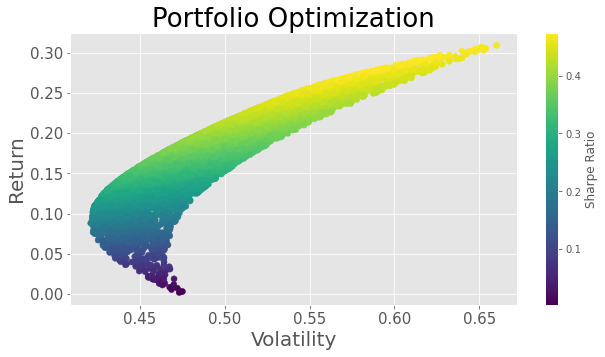

In [81]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

### Comparison with individual assets:

In [82]:
returns

,JWN,UBER,RCL
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.003551,NaN,0.000000
2014-01-06,-0.012225,NaN,-0.021412
2014-01-07,-0.010585,NaN,-0.002166
2014-01-08,-0.004444,NaN,0.010855
...,...,...,...
2020-11-16,0.108608,0.033606,0.069254
2020-11-17,0.060969,-0.006503,-0.002119
2020-11-18,0.021120,0.004500,-0.016061


In [83]:
returns.mean() # daily returns of the two stocks.

JWN    -0.000016
UBER    0.001242
RCL     0.000852
dtype: float64

In [84]:
returns.std() # dailty standard deviation of the two stocks.

JWN     0.030122
UBER    0.041934
RCL     0.032307
dtype: float64

In [85]:
returns.mean() * 252 # annual returns of the two stocks.

JWN    -0.004019
UBER    0.313015
RCL     0.214644
dtype: float64

In [86]:
returns.std() * 252 # annual standard deviations of the two stocks.

JWN      7.590759
UBER    10.567470
RCL      8.141451
dtype: float64

In [87]:
returns.std() * np.sqrt(252) 

JWN     0.478173
UBER    0.665688
RCL     0.512863
dtype: float64